In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras.layers import LSTM
from keras import backend as K 

import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
 

df = pd.read_csv('C:/Users/Sathish Akula/python_scripts/NWM_ML_Scripts/0to30_lead_data/out_lead_10day_data.csv',delimiter = '\t')

df=df.sample(frac=1).reset_index(drop=True)


df.iloc[:,16] =abs(df.iloc[:,16] - df.iloc[:,15])

x, y = df.iloc[:, 1:16], df.iloc[:,16]

y = y.values.reshape(y.shape[0],1)
x_train, x_test, y_train, y_test = \
train_test_split(x, y, test_size=0.1, 
                                 random_state=0)
x_mean = x_train.mean(axis=0)
x_train -= x_mean
x_std = x_train.std(axis=0)
x_train /= x_std

x_test -= x_mean
x_test /= x_std 

y_mean = y_train.mean(axis=0)
y_train -=y_mean
y_std=y_train.std(axis=0)
y_train /=y_std

y_test -=y_mean
y_test /=y_std


from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras.layers import LSTM
from keras import backend as K 


model= Sequential()

model.add(layers.Dense(512, activation='relu',input_shape=(x_train.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dropout(0.4))
#model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
#end edit    
# Fitting the RNN to the Training set
history=model.fit(x_train, y_train,validation_data=(x_test, y_test), batch_size = 1024, epochs = 20)


 

Epoch 1/20
135/135 [==============================] - 1s 7ms/step - loss: 0.7135 - mae: 0.1771 - val_loss: 0.5709 - val_mae: 0.1659
Epoch 2/20
135/135 [==============================] - 1s 6ms/step - loss: 0.6886 - mae: 0.1633 - val_loss: 0.5376 - val_mae: 0.1822
Epoch 3/20
135/135 [==============================] - 1s 6ms/step - loss: 0.6775 - mae: 0.1632 - val_loss: 0.5328 - val_mae: 0.1563
Epoch 4/20
135/135 [==============================] - 1s 6ms/step - loss: 0.6698 - mae: 0.1596 - val_loss: 0.5395 - val_mae: 0.1458
Epoch 5/20
135/135 [==============================] - 1s 6ms/step - loss: 0.6627 - mae: 0.1589 - val_loss: 0.5337 - val_mae: 0.1457
Epoch 6/20
135/135 [==============================] - 1s 6ms/step - loss: 0.6598 - mae: 0.1582 - val_loss: 0.5299 - val_mae: 0.1668
Epoch 7/20
135/135 [==============================] - 1s 6ms/step - loss: 0.6532 - mae: 0.1583 - val_loss: 0.5250 - val_mae: 0.1672
Epoch 8/20
135/135 [==============================] - 1s 6ms/step - loss: 0.

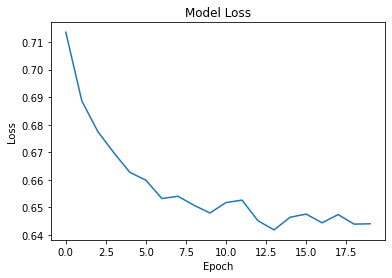

<Figure size 432x288 with 0 Axes>

In [8]:

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
plt.savefig('C:/Users/Sathish Akula/python_scripts/NWM_ML_Scripts/new scripts/old_script_rerun/Final_rerun/graph_data/model_loss.png')
plt.savefig('C:/Users/Sathish Akula/python_scripts/NWM_ML_Scripts/new scripts/old_script_rerun/Final_rerun/graph_data/model_loss.pdf')

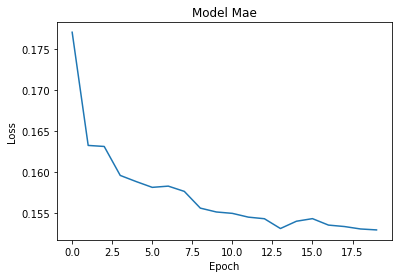

<Figure size 432x288 with 0 Axes>

In [9]:
plt.plot(history.history['mae'])
plt.title('Model Mae')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
plt.savefig('C:/Users/Sathish Akula/python_scripts/NWM_ML_Scripts/new scripts/old_script_rerun/Final_rerun/graph_data/model_mae.png')
plt.savefig('C:/Users/Sathish Akula/python_scripts/NWM_ML_Scripts/new scripts/old_script_rerun/Final_rerun/graph_data/model_mae.pdf')

In [11]:
history.history['mae']

[0.17708465456962585,
 0.1632903814315796,
 0.1631653904914856,
 0.1596340835094452,
 0.15888313949108124,
 0.1581806242465973,
 0.15833069384098053,
 0.157690167427063,
 0.15565012395381927,
 0.15518034994602203,
 0.15501070022583008,
 0.15455052256584167,
 0.1543574333190918,
 0.15316462516784668,
 0.15405257046222687,
 0.15436773002147675,
 0.15358157455921173,
 0.1534048318862915,
 0.1531088799238205,
 0.1529938280582428]

In [12]:
history.history['loss']

[0.7135439515113831,
 0.6886478066444397,
 0.6774839758872986,
 0.6698009371757507,
 0.66269451379776,
 0.6598488092422485,
 0.6531819105148315,
 0.654015839099884,
 0.6507630348205566,
 0.6479368805885315,
 0.6517342925071716,
 0.652612030506134,
 0.6451146006584167,
 0.6418014764785767,
 0.6463872194290161,
 0.6475543975830078,
 0.6443801522254944,
 0.6473695039749146,
 0.6438984274864197,
 0.6440290808677673]